# SECTION 1 inclusion de packages externes 


In [ ]:
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
# POUR LA MORPHO
import skimage.morphology as morpho  
import skimage.feature as skf
from skimage.future import graph
from scipy import ndimage as ndi
from skimage import data, io, segmentation, color

# SECTION 2 fonctions utiles

In [ ]:
def viewimage(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI et MAXI seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase=' ' 
    else: #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase= ' &'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M

    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.png')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)

def viewimage_color(im,normalise=True,MINI=0.0, MAXI=255.0):
    """ Cette fonction fait afficher l'image EN NIVEAUX DE GRIS 
        dans gimp. Si un gimp est deja ouvert il est utilise.
        Par defaut normalise=True. Et dans ce cas l'image est normalisee 
        entre 0 et 255 avant d'être sauvegardee.
        Si normalise=False MINI(defaut 0) et MAXI (defaut 255) seront mis a 0 et 255 dans l'image resultat
        
    """
    imt=np.float32(im.copy())
    if platform.system()=='Darwin': #on est sous mac
        prephrase='open -a GIMP '
        endphrase= ' '
    else: #SINON ON SUPPOSE LINUX (si vous avez un windows je ne sais comment faire. Si vous savez dites-moi.)
        prephrase='gimp '
        endphrase=' &'
    
    if normalise:
        m=imt.min()
        imt=imt-m
        M=imt.max()
        if M>0:
            imt=imt/M
    else:
        imt=(imt-MINI)/(MAXI-MINI)
        imt[imt<0]=0
        imt[imt>1]=1
    
    nomfichier=tempfile.mktemp('TPIMA.pgm')
    commande=prephrase +nomfichier+endphrase
    skio.imsave(nomfichier,imt)
    os.system(commande)


def strel(forme,taille,angle=45):
    """renvoie un element structurant de forme  
     'diamond'  boule de la norme 1 fermee de rayon taille
     'disk'     boule de la norme 2 fermee de rayon taille
     'square'   carre de cote taille (il vaut mieux utiliser taille=impair)
     'line'     segment de langueur taille et d'orientation angle (entre 0 et 180 en degres)
      (Cette fonction n'est pas standard dans python)
    """

    if forme == 'diamond':
        return morpho.selem.diamond(taille)
    if forme == 'disk':
        return morpho.selem.disk(taille)
    if forme == 'square':
        return morpho.selem.square(taille)
    if forme == 'line':
        angle=int(-np.round(angle))
        angle=angle%180
        angle=np.float32(angle)/180.0*np.pi
        x=int(np.round(np.cos(angle)*taille))
        y=int(np.round(np.sin(angle)*taille))
        if x**2+y**2 == 0:
            if abs(np.cos(angle))>abs(np.sin(angle)):
                x=int(np.sign(np.cos(angle)))
                y=0
            else:
                y=int(np.sign(np.sin(angle)))
                x=0
        rr,cc=morpho.selem.draw.line(0,0,y,x)
        rr=rr-rr.min()
        cc=cc-cc.min()
        img=np.zeros((rr.max()+1,cc.max()+1) )
        img[rr,cc]=1
        return img
    raise RuntimeError('Erreur dans fonction strel: forme incomprise')

            

def couleurs_alea(im):
    """ 
    Donne des couleurs aleatoires a une image en niveau de gris.
    Cette fonction est utile lorsque le niveua de gris d'interprete comme un numero
      de region. Ou encore pour voir les leger degrades d'une teinte de gris.
      """
    sh=im.shape
    out=np.zeros((sh[0],sh[1],3),dtype=np.uint8)
    nbcoul=np.int32(im.max())
    tabcoul=np.random.randint(0,256,size=(nbcoul+1,3))
    tabcoul[0,:]=0
    for k in range(sh[0]):
        for l in range(sh[1]):
            out[k,l,:]=tabcoul[im[k,l]]
    return out

# SECTION 3 Binary Images

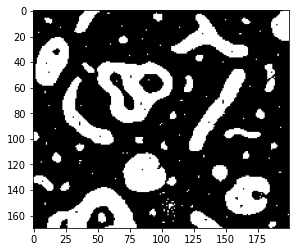

In [ ]:
# Images binaire
im1=skio.imread('Images/cell.pgm')
#im1=skio.imread('Images/bat200.bmp')
#im1=skio.imread('Images/cafe.bmp')
#im1=skio.imread('Images/retina2.gif')
#im1=skio.imread('Images/bulles.bmp')
#im1=skio.imread('Images/laiton.bmp')

plt.imshow(im1,cmap="gray")

In [ ]:
#Structuring element
se1=strel('diamond',2)
#se1=strel('square',2)
#se1=strel('diamond',2)
#se1=strel('line',2)

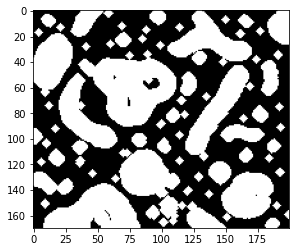

In [ ]:
# dilatation
bin_dil=morpho.dilation(im1,se1)
plt.imshow(bin_dil,cmap="gray")

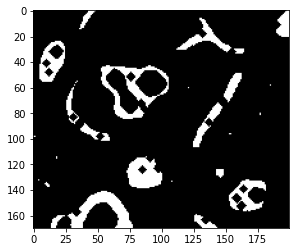

In [ ]:
# erosion
bin_ero=morpho.erosion(im1,se1)
plt.imshow(bin_ero,cmap="gray")

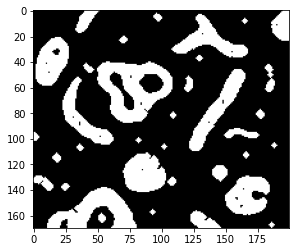

In [ ]:
#ouverture
bin_open=morpho.opening(im1,se1)
plt.imshow(bin_open,cmap="gray")

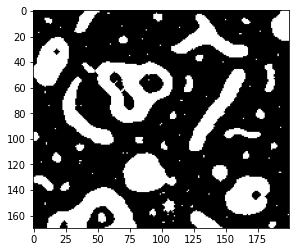

In [ ]:
#fermeture
bin_close=morpho.closing(im1,se1)
plt.imshow(bin_close,cmap="gray")

# SECTION 4 Gray Images

(256, 256)


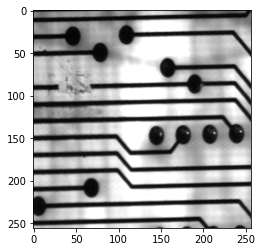

In [ ]:
# Images Gray
im1=skio.imread('Images/circuit.pgm')
#im1=skio.imread('Images/bat200.bmp')
#im1=skio.imread('Images/cafe.bmp')
#im1=skio.imread('Images/retina2.gif')
#im1=skio.imread('Images/bulles.bmp')
#im1=skio.imread('Images/laiton.bmp')
print(im1.shape)
plt.imshow(im1,cmap="gray")

In [ ]:
#Structuring element
se1=strel('diamond',2)
#se1=strel('square',2)
#se1=strel('diamond',2)
#se1=strel('line',2)
se1

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

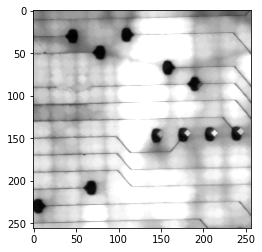

In [ ]:
# dilatation
gray_dil=morpho.dilation(im1,se1)
plt.imshow(gray_dil,cmap="gray")

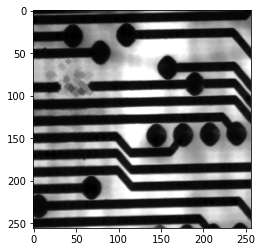

In [ ]:
# erosion
gray_ero=morpho.erosion(im1,se1)
plt.imshow(gray_ero,cmap="gray")

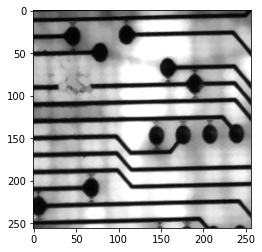

In [ ]:
#ouverture
gray_open=morpho.opening(im1,se1)
plt.imshow(gray_open,cmap="gray")

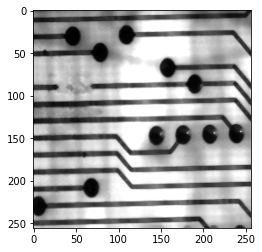

In [ ]:
#fermeture
gray_close=morpho.closing(im1,se1)
plt.imshow(gray_close,cmap="gray")

# SECTION 5 - Adjacency Regions by Irregular Graphs

In [ ]:


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.nodes[dst]['mean color'] - graph.nodes[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.nodes[dst]['total color'] += graph.nodes[src]['total color']
    graph.nodes[dst]['pixel count'] += graph.nodes[src]['pixel count']
    graph.nodes[dst]['mean color'] = (graph.nodes[dst]['total color'] /
                                      graph.nodes[dst]['pixel count'])
    
def display_edges(image, g, threshold):
    """Draw edges of a RAG on its image
 
    Returns a modified image with the edges drawn.Edges are drawn in green
    and nodes are drawn in yellow.
 
    Parameters
    ----------
    image : ndarray
        The image to be drawn on.
    g : RAG
        The Region Adjacency Graph.
    threshold : float
        Only edges in `g` below `threshold` are drawn.
 
    Returns:
    out: ndarray
        Image with the edges drawn.
    """
    image = image.copy()
    for edge in g.edges_iter():
        n1, n2 = edge
 
        r1, c1 = map(int, rag.node[n1]['centroid'])
        r2, c2 = map(int, rag.node[n2]['centroid'])
 
        line  = draw.line(r1, c1, r2, c2)
        circle = draw.circle(r1,c1,2)
 
        if g[n1][n2]['weight'] < threshold :
            image[line] = 0,1,0
        image[circle] = 1,1,0
 
    return image

def show_img(img):
    width = 10.0
    height = img.shape[0]*width/img.shape[1]
    f = plt.figure(figsize=(width, height))
    plt.imshow(img)


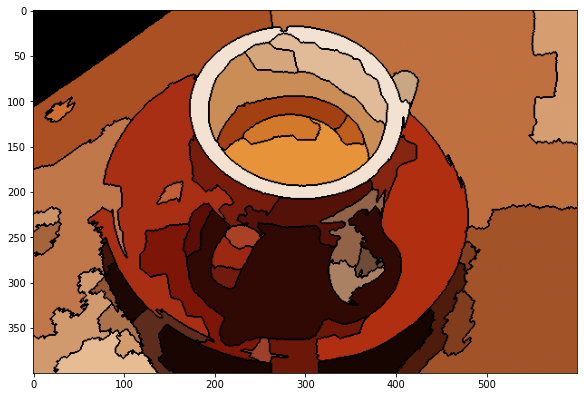

In [ ]:
# Example
img = data.coffee()
labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, img, kind='avg', bg_label=0)
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))

#rag = graph.rag_mean_color(img, labels2)

#edges_drawn_all = display_edges(out, rag, 29 )
#show_img(edges_drawn_all)
#io.imshow(out)
#io.show()


 
show_img(out)

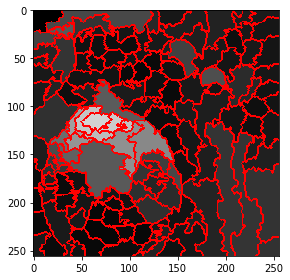

In [ ]:
img = skio.imread('Images/meb.jpg')
#img = data.coffee()
#img = skio.imread('Images/circuit.jpg')
labels = segmentation.slic(img, compactness=3, n_segments=300)
g = graph.rag_mean_color(img, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=1, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

segm_image = color.label2rgb(labels2, img, kind='avg', bg_label=0)
segm_image_border = segmentation.mark_boundaries(segm_image, labels2, (1, 0, 0))
io.imshow(segm_image_border)
io.show()

In [ ]:
from skimage.io import imsave

In [ ]:
for i in range(0,24):
  labels = segmentation.slic(img, compactness=15, n_segments=(100 * (i+1)))
  g = graph.rag_mean_color(img, labels)
  labels2 = graph.merge_hierarchical(labels, g, thresh=1, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)
  
  segm_image = color.label2rgb(labels2, img, kind='avg', bg_label=0)
  segm_image_border = segmentation.mark_boundaries(segm_image, labels2, (1, 0, 0))
  #show_img(segm_image_border)
  #io.imshow(segm_image_border)
  #io.show()
  imsave('region-0{}.png'.format(i), segm_image_border)

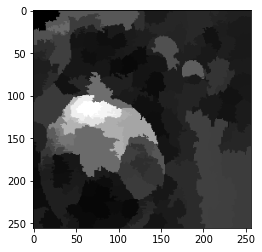

In [ ]:
from skimage.color import rgb2gray
im1 = rgb2gray(segm_image)
plt.imshow(im1,cmap="gray")

In [ ]:
#Structuring element
se1=strel('diamond',2)
#se1=strel('square',2)
#se1=strel('diamond',2)
#se1=strel('line',2)
se1

array([[0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

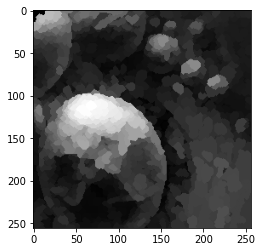

In [ ]:
gray_dil=morpho.dilation(im1,se1)
plt.imshow(gray_dil,cmap="gray")

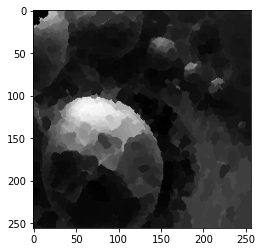

In [ ]:
# erosion
gray_ero=morpho.erosion(im1,se1)
plt.imshow(gray_ero,cmap="gray")

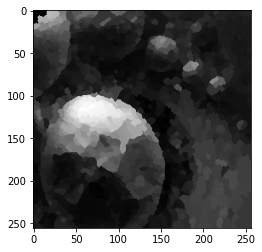

In [ ]:
#ouverture
gray_open=morpho.opening(im1,se1)
plt.imshow(gray_open,cmap="gray")

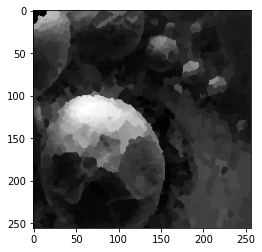

In [ ]:
#fermeture
gray_close=morpho.closing(im1,se1)
plt.imshow(gray_close,cmap="gray")